In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy import stats

In [2]:
data = pd.read_csv("ESSdata_Thinkful.csv")
data = data.dropna()

In [3]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
data.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
# Shapiro Test for all variables
def shapiro_test(column_name):
    
    subset = data[column_name][1:100]
    subset = subset.dropna()
    print("column name:{} shapiro test result:  {}".format(column_name,stats.shapiro(subset)))

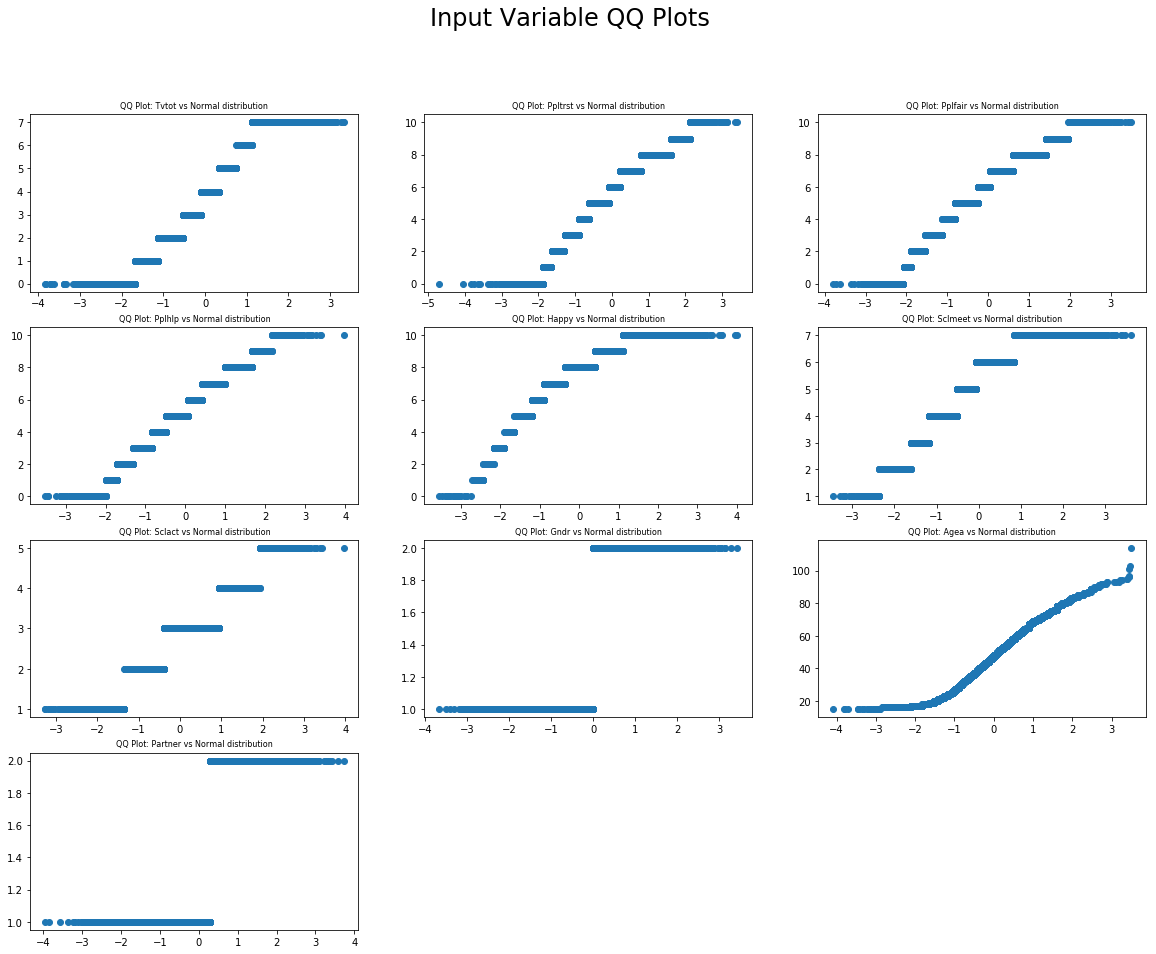

In [6]:
# QQ plots for each variable to assess normality
variables = data.drop(["cntry","idno","year"], axis=1)
data_variables = variables.columns
number_of_plots = len(data_variables)
current_plot_number = 1
plot_rows = 4

h = plt.figure(figsize=(20, 15))

for variable in data_variables:
    plt.subplot(plot_rows, math.ceil(number_of_plots/plot_rows), current_plot_number)
            
    sorted_vars = variables[variable].sort_values()
    normal_distribution = np.random.normal(0, 1, len(variables[variable]))
    normal_distribution.sort()
    
    #Create the QQ plot
    plt.plot(normal_distribution, sorted_vars, "o",)
    plt.title("QQ Plot: {} vs Normal distribution".format(variable.title()),fontsize=8)
    
    current_plot_number += 1
    
plt.suptitle("Input Variable QQ Plots",fontsize=24)
plt.savefig("qqplots")
plt.show()

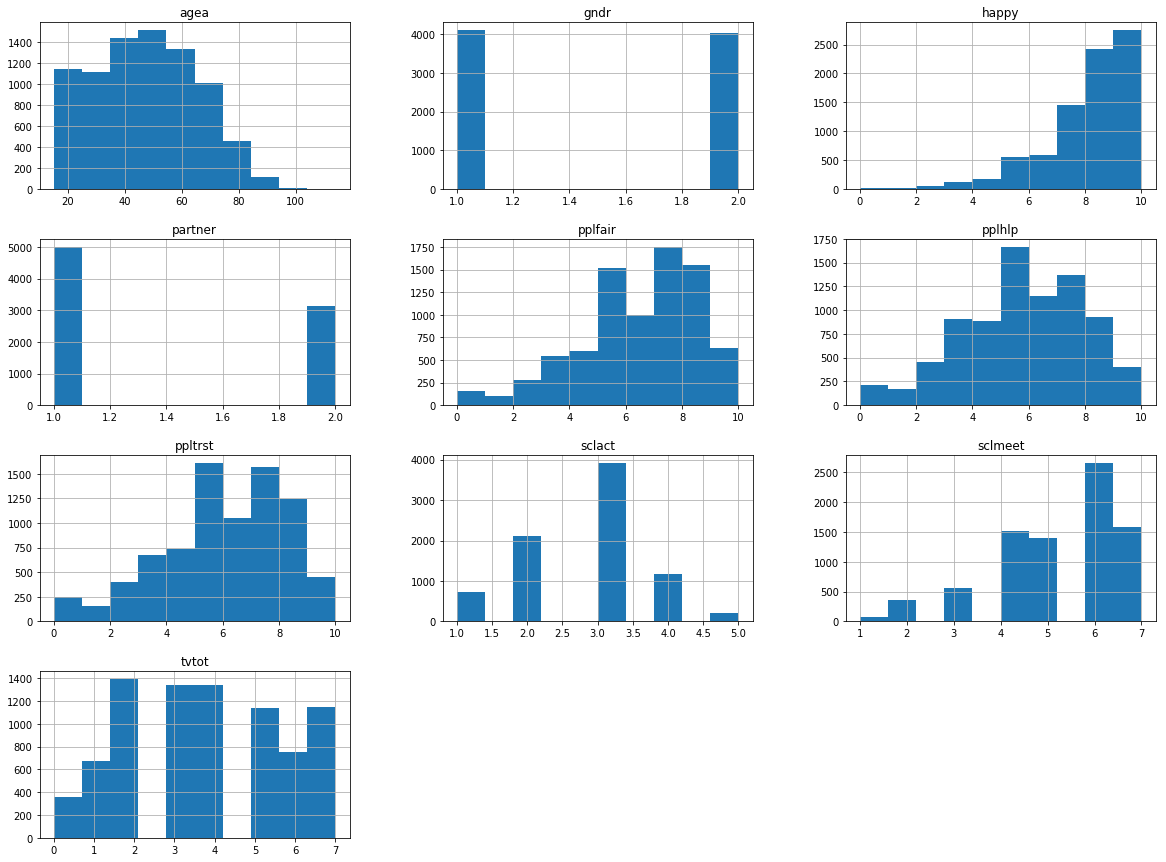

In [7]:
# Histograms
variables.hist(figsize=(20, 15))
plt.show()

In [8]:
countries = data.cntry.unique().tolist()
print(countries)

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']


In [9]:
def country_comparison(target_metric):
    data_2012 = data.loc[(data["year"] == 6),target_metric]
    data_2014 = data.loc[(data["year"] == 7),target_metric]
    print("Total comparison: {}".format(stats.ttest_ind(data_2012, data_2014)))
    for country in countries:
        country_data_2012 = data.loc[(data["year"] == 6) & (data['cntry'] == country),target_metric]
        country_data_2014 = data.loc[(data["year"] == 7) & (data['cntry'] == country),target_metric]
        mean_2012 = np.mean(country_data_2012)
        mean_2014 = np.mean(country_data_2014)
        print("Country: {}, 2012 Mean: {:0.2f}, 2014 Mean: {:0.2f}, Results: {} :".format(country,mean_2012, mean_2014,stats.ttest_ind(country_data_2012, country_data_2014)))
    
    

In [29]:
data_2012 = data.loc[(data["year"] == 6),'happy']


1.) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [10]:
country_comparison("ppltrst")

Total comparison: Ttest_indResult(statistic=0.14436850819698421, pvalue=0.88521305488891056)
Country: CH, 2012 Mean: 5.69, 2014 Mean: 5.76, Results: Ttest_indResult(statistic=-0.71569747922178162, pvalue=0.47429160029094908) :
Country: CZ, 2012 Mean: 4.40, 2014 Mean: 4.36, Results: Ttest_indResult(statistic=0.34075433231518504, pvalue=0.73334793159099765) :
Country: DE, 2012 Mean: 5.08, 2014 Mean: 5.36, Results: Ttest_indResult(statistic=-0.34662131701252841, pvalue=0.73177642737857318) :
Country: ES, 2012 Mean: 5.13, 2014 Mean: 4.94, Results: Ttest_indResult(statistic=2.1000674443244907, pvalue=0.035832041935213631) :
Country: NO, 2012 Mean: 6.65, 2014 Mean: 6.60, Results: Ttest_indResult(statistic=0.51192241811452277, pvalue=0.60878502181319782) :
Country: SE, 2012 Mean: 6.04, 2014 Mean: 6.24, Results: Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.042829363452229798) :


C:\Users\shaba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


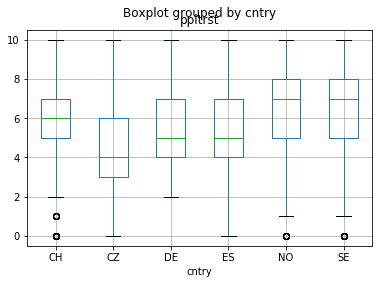

In [44]:
data.boxplot(column='ppltrst', by='cntry')
plt.show()

Overall there wasn't statistical significance for all countries.  However for two countries there was a change, in Spain they became more trusting and in Sweden they became less trusting.

2.) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [11]:
country_comparison("happy")

Total comparison: Ttest_indResult(statistic=1.2074597686358974, pvalue=0.22729019122839689)
Country: CH, 2012 Mean: 8.08, 2014 Mean: 8.14, Results: Ttest_indResult(statistic=-0.81214248832740099, pvalue=0.41684110117700179) :
Country: CZ, 2012 Mean: 6.79, 2014 Mean: 6.92, Results: Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238) :
Country: DE, 2012 Mean: 7.31, 2014 Mean: 7.86, Results: Ttest_indResult(statistic=-0.96631754122855895, pvalue=0.34314091287270732) :
Country: ES, 2012 Mean: 7.56, 2014 Mean: 7.45, Results: Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369) :
Country: NO, 2012 Mean: 8.25, 2014 Mean: 7.92, Results: Ttest_indResult(statistic=4.1529572059972661, pvalue=3.4778681704487346e-05) :
Country: SE, 2012 Mean: 7.90, 2014 Mean: 7.94, Results: Ttest_indResult(statistic=-0.53727902103263936, pvalue=0.59114423062723875) :


Overall there wasn't statistical significance for all countries.  For Norway there was an increase in happiness.

C:\Users\shaba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


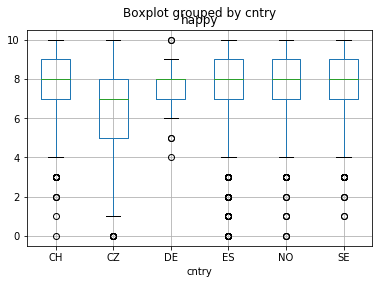

In [43]:
data.boxplot(column='happy', by='cntry')
plt.show()

3.) Who reported watching more TV in 2012, men or women?

In [12]:
gender = data.gndr.unique().tolist()
print(gender)

[2.0, 1.0]


In [13]:
def gender_comparison(target_metric):
    male = data.loc[(data["gndr"] == 1) & (data["year"] == 6),target_metric]
    female = data.loc[(data["gndr"] == 2) & (data["year"] == 6),target_metric]
    print("Male Mean: {:0.2f} , Female Mean: {:0.2f}, Test Results: {}".format(np.mean(male),np.mean(female),stats.ttest_ind(male, female)))
   

In [14]:
# T-Test for comarison whether men or women reported watching more TV in 2012
gender_comparison("tvtot")

Male Mean: 3.86 , Female Mean: 3.91, Test Results: Ttest_indResult(statistic=-0.73235521926405578, pvalue=0.46399396461101539)


There was not an adequate p-vale in order to determine there was a meaningful difference between the two groups.

C:\Users\shaba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


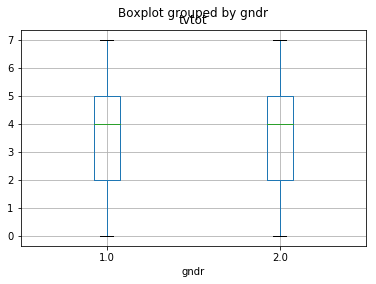

In [45]:
data.boxplot(column='tvtot', by='gndr')
plt.show()

4.) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [15]:
def partner_comparison(target_metric):
    w_partner = data.loc[(data["partner"] == 1) & (data["year"] == 6),target_metric]
    alone = data.loc[(data["partner"] == 2) & (data["year"] == 6),target_metric]
    print("W/Partner Mean: {:0.2f} , Live ALone Mean: {:0.2f}, Test Results: {}".format(np.mean(w_partner),np.mean(alone),stats.ttest_ind(w_partner, alone)))
   

In [16]:
# T-Test for comparison whether those who live alone or with a partner believe people are fair
partner_comparison("pplfair")

W/Partner Mean: 6.07 , Live ALone Mean: 5.87, Test Results: Ttest_indResult(statistic=3.0430439318464235, pvalue=0.0023569366769392482)


People who live alone were most likely to believe people were fair in 2012 based on the pvalue and stastistic.

C:\Users\shaba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


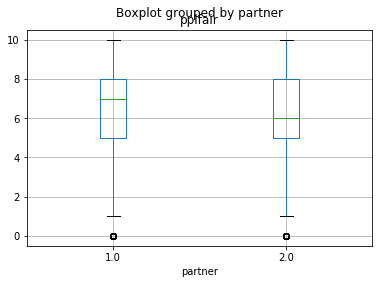

In [46]:
data.boxplot(column='pplfair', by='partner')
plt.show()

5.) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [22]:
def country_social_comparison(target_metric):
    Switzerland = data.loc[(data["cntry"] == "CH") & (data["year"] == 7),target_metric]
    Germany = data.loc[(data["cntry"] == "DE") & (data["year"] == 7),target_metric]
    Spain = data.loc[(data["cntry"] == "ES") & (data["year"] == 7),target_metric]
    print("Switzerland Mean: {:0.2f} , Germany Mean: {:0.2f}, Spain Mean: {:0.2f}, Test Results: {}".format(np.mean(Switzerland),np.mean(Germany),np.mean(Spain),stats.f_oneway(Switzerland, Germany, Spain)))
    print("Switzerland vs Germany Test Results: {}".format(stats.ttest_ind(Switzerland, Germany)))
    print("Switzerland vs Spain Test Results: {}".format(stats.ttest_ind(Switzerland, Spain)))
    print("Germany vs Spain Test Results: {}".format(stats.ttest_ind(Germany, Spain)))

In [23]:
# ANOVA for social meetings comparison
country_social_comparison("sclmeet")

Switzerland Mean: 5.17 , Germany Mean: 4.43, Spain Mean: 5.26, Test Results: F_onewayResult(statistic=3.251979328884365, pvalue=0.038914404595927585)
Switzerland vs Germany Test Results: Ttest_indResult(statistic=2.137774079859156, pvalue=0.032855611686425916)
Switzerland vs Spain Test Results: Ttest_indResult(statistic=-1.3563979158247432, pvalue=0.17513589623821907)
Germany vs Spain Test Results: Ttest_indResult(statistic=-2.1688655657121281, pvalue=0.030298013218196748)


Based on the pvalue there does appear to be statistical significance in the difference between the groups. Germany appears to be higher than Switzerland, and Spain higher than Germany, but there appears to not be a meaningful difference between Switzerland and Spain.

6.) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [24]:
# ANOVA for social activities comparison
country_social_comparison("sclact")

Switzerland Mean: 2.78 , Germany Mean: 2.71, Spain Mean: 2.63, Test Results: F_onewayResult(statistic=6.0721131197482805, pvalue=0.0023515806384441481)
Switzerland vs Germany Test Results: Ttest_indResult(statistic=0.28869953984944624, pvalue=0.77289055980344534)
Switzerland vs Spain Test Results: Ttest_indResult(statistic=3.478987931157087, pvalue=0.00051480900723358165)
Germany vs Spain Test Results: Ttest_indResult(statistic=0.32503027389966244, pvalue=0.74521748502094121)


Based on the pvalue there does appear to be statistical significance in the difference between the groups. There only apears to be a difference between Switzerland and Spain, with Spain being greater than Switzerland.